# Topic - Online Retail

## Dataset Description

Dataset name: Online Retail <br>
Source: https://www.kaggle.com/hellbuoy/online-retail-customer-clustering

Dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2010 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

#### Attribute Information:
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction.<br>
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.<br>
Description: Product (item) name. Nominal.<br>
Quantity: The quantities of each product (item) per transaction. Numeric.<br>
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.<br>
UnitPrice: Unit price. Numeric. Product price per unit.<br>
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.<br>
Country: Country name. Nominal. The name of the country where a customer resides.<br>

# Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding = 'ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
data.shape

(541909, 8)

In [8]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Data Preparation

In [9]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

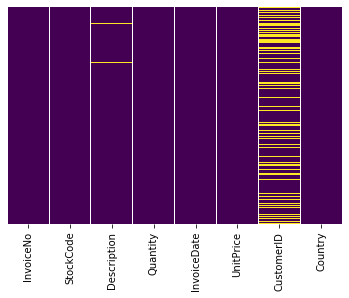

In [10]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

yellow lines indicate the presence of null values.

In [11]:
data['CustomerID'].isnull().sum()

135080

In [12]:
missing_id = round(100 - ((541909-135000)/541909 * 100),2)
missing_id

24.91

Approximately 25% of the "CustomerID" data is missing.

In [13]:
data['Description'].isnull().sum()

1454

In [14]:
missing_desc = round(100 - ((541909-1454)/541909 * 100),2)
missing_desc

0.27

Approximately 0.3% of the "Description" data is missing.

Because "CustomerId" is a unique entity so we can't use any missing value treatment and for "Description" also we can't use any missing value treatment. So we will prooceed with dropping the missing rows now.

In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Feature engineering

In [17]:
data['InvoiceDate'].head()

0    01-12-2010 08:26
1    01-12-2010 08:26
2    01-12-2010 08:26
3    01-12-2010 08:26
4    01-12-2010 08:26
Name: InvoiceDate, dtype: object

we will change the data type of "InvoiceDate" to Datetime.

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [19]:
data['InvoiceDate'].head()

0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [20]:
# now we can extract year 
data['year'] = data['InvoiceDate'].apply(lambda date: date.year)

In [21]:
data['year'].unique()

array([2010, 2011], dtype=int64)

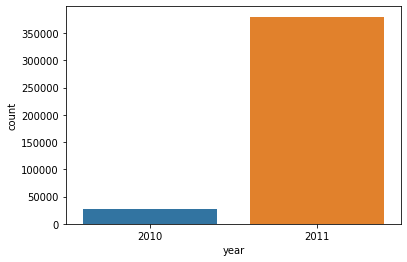

In [22]:
sns.countplot(data['year'])

In [23]:
# now we can extract month  
data['month'] = data['InvoiceDate'].apply(lambda date: date.month)

In [24]:
sorted(data['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [25]:
month_transaction = data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False)

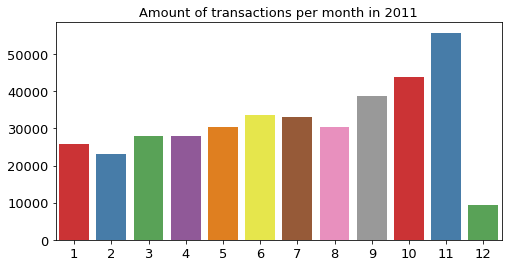

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(month_transaction.index, month_transaction.values, order= month_transaction.index, palette='Set1')
plt.title('Amount of transactions per month in 2011',fontsize=13)
plt.tick_params(labelsize=13)

### We will also create two new fields:

#### 1. Total amount spent (by customer)

In [27]:
data['Total Amount Spent']= data['Quantity'] * data['UnitPrice']
total_amount = data['Total Amount Spent'].groupby(data['CustomerID']).sum()

In [28]:
total_amount.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Total Amount Spent, dtype: float64

In [29]:
total_amount = pd.DataFrame(total_amount).reset_index()

In [30]:
total_amount.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### 2. Total Transactons (by customer)

In [31]:
transactions = data['InvoiceNo'].groupby(data['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()

In [32]:
transaction = transaction.rename(columns={'InvoiceNo':'Total Transactions'})
transaction.head()

,CustomerID,Total Transactions
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Merging newly created columns

In [33]:
data_new = pd.merge(total_amount, transaction, how='inner', on='CustomerID')

In [34]:
data_new.head()

,CustomerID,Total Amount Spent,Total Transactions
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


# Exploratory data analysis

### Most ordered products?

In [35]:
product = data.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity', ascending = False).reset_index().head()

In [36]:
product = pd.DataFrame(product)

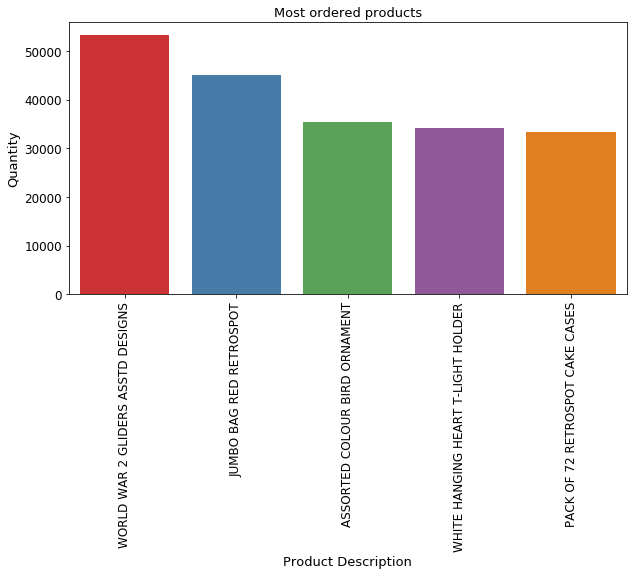

In [37]:
plt.figure(figsize=(10,5))
sns.barplot('Description','Quantity',data=product,palette='Set1')
plt.xlabel('Product Description',fontsize=13)
plt.ylabel('Quantity',fontsize=13)
plt.title('Most ordered products',fontsize=13)
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)

### Which customers are most common?

In [38]:
customer = data['CustomerID'].value_counts().sort_values(ascending=False).iloc[0:10]

In [39]:
customer.index

Float64Index([17841.0, 14911.0, 14096.0, 12748.0, 14606.0, 15311.0, 14646.0,
              13089.0, 13263.0, 14298.0],
             dtype='float64')

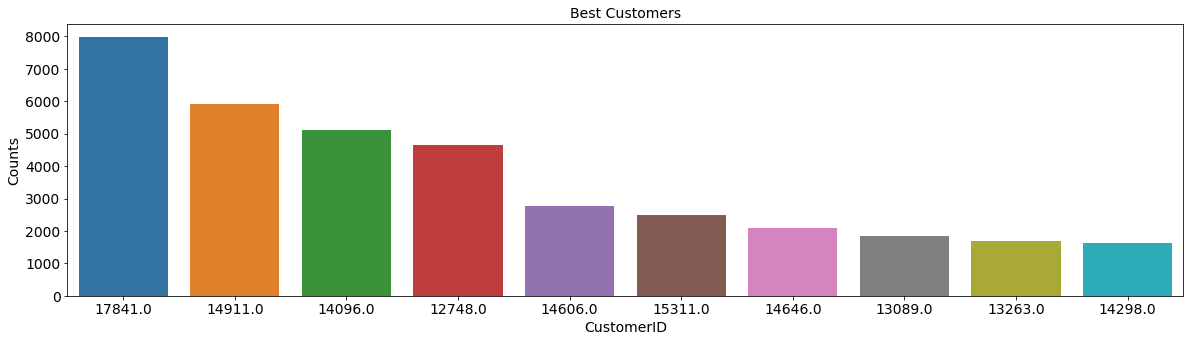

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(customer.index, customer.values, order=customer.index)
plt.ylabel('Counts',fontsize=14)
plt.xlabel('CustomerID',fontsize=14)
plt.title('Best Customers',fontsize=14)
plt.tick_params(labelsize=14)

### Which countries made the most transactions? 

In [41]:
country = data['Country'].value_counts().sort_values(ascending=False).iloc[0:7]

In [42]:
country.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium'],
      dtype='object')

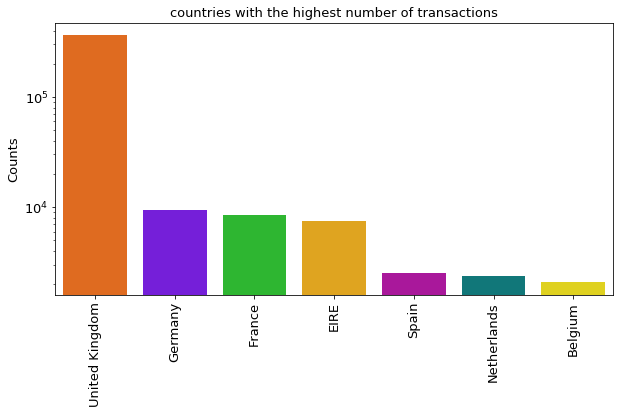

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(country.index, country.values, palette='prism_r')
plt.ylabel('Counts',fontsize=13)
plt.title('countries with the highest number of transactions',fontsize=13)
plt.tick_params(labelsize=13)
plt.xticks(rotation=90)
plt.yscale('log')

### From Which countries did we get the most revenue?

In [44]:
revenue = data.groupby('Country').agg({'Total Amount Spent':'sum'}).sort_values('Total Amount Spent',ascending = False)

In [45]:
revenue = pd.DataFrame(revenue.reset_index().head())

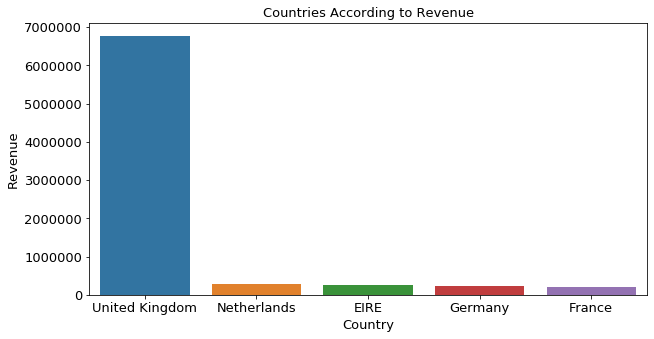

In [46]:
plt.figure(figsize=(10,5))
sns.barplot('Country','Total Amount Spent',data=revenue)
plt.ylabel('Revenue',fontsize=13)
plt.xlabel('Country',fontsize=13)
plt.title('Countries According to Revenue',fontsize=13)
plt.tick_params(labelsize=13)

# Model Building

### K Means Clustering Model

In [47]:
from sklearn.cluster import KMeans

In [48]:
X = data_new.iloc[:, [1, 2]]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X

array([[-0.23100099, -0.3917197 ],
       [ 0.29343167,  0.38265697],
       [-0.01231622, -0.26695902],
       ...,
       [-0.20951263, -0.34439668],
       [ 0.02390005,  2.85205812],
       [-0.00744423, -0.0991774 ]])

In [51]:
error_rate = []
for i in range(1, 26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    error_rate.append(kmeans.inertia_)

In [52]:
error_rate

[8744.0,
 4625.626218628224,
 3236.6220295240714,
 2098.916168021044,
 1476.4344678936109,
 1209.5800320839137,
 1014.4884825290036,
 863.164651834313,
 765.021597705405,
 650.5812840388132,
 547.5714464269438,
 476.62773531810217,
 404.2701659490981,
 344.13581786073803,
 313.61795342107956,
 281.1261120559238,
 253.02956390997406,
 222.7845532326724,
 199.20433602291865,
 184.97410077475965,
 170.90748088071297,
 161.0750051960018,
 153.29711034907402,
 140.7410646704046,
 132.73127419510658]

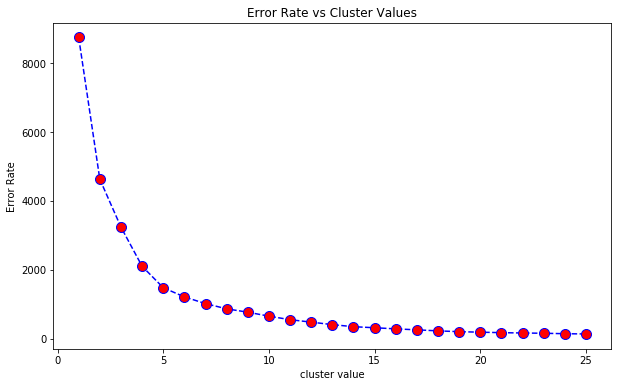

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs Cluster Values')
plt.xlabel('cluster value')
plt.ylabel('Error Rate');

In the plot above the elbow is at n=3 indicating the optimal clusters for this dataset is 3. 

NOTE: by looking at the plot, it is a bit hard to select between n=3, n=4 and n=5 for n_clusters value. But we will select n=3   because of silhouette score. 

In [54]:
kmeans = KMeans(n_clusters=3, init = 'k-means++',random_state=100)
y_kmeans = kmeans.fit_predict(X)

In [55]:
kmeans.cluster_centers_

array([[-0.03353719, -0.02749624],
       [23.14383293,  3.95941676],
       [ 7.65089359, 25.04225176]])

In [56]:
kmeans.inertia_

3236.6220295240714

In [57]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
prediction = pd.DataFrame(y_kmeans, columns=['prediction'])
data_new = data_new.join(prediction)

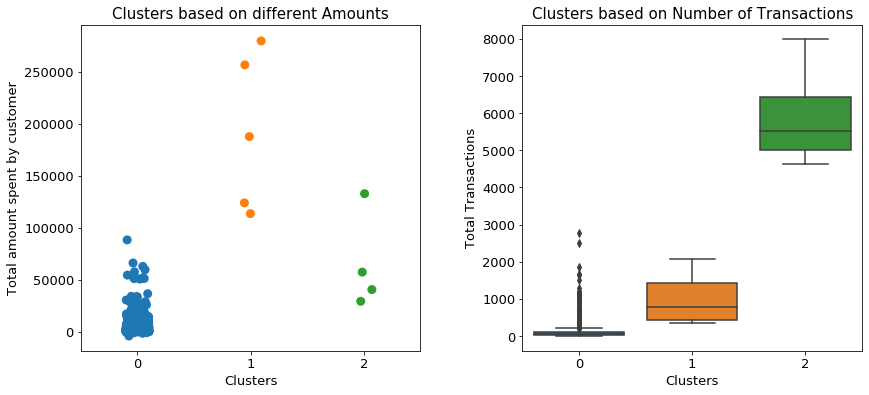

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))

sns.stripplot(x='prediction', y='Total Amount Spent', data=data_new, ax = ax1, s=9)
ax1.set_title('Clusters based on different Amounts',fontsize = 15)
ax1.set_ylabel('Total amount spent by customer',fontsize = 13)
ax1.set_xlabel('Clusters',fontsize = 13)
ax1.tick_params(labelsize=13)

sns.boxplot(x='prediction', y='Total Transactions', data=data_new, ax = ax2)
ax2.set_title('Clusters based on Number of Transactions',fontsize = 15)
ax2.set_ylabel('Total Transactions',fontsize = 13)
ax2.set_xlabel('Clusters',fontsize = 13)
ax2.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.3)

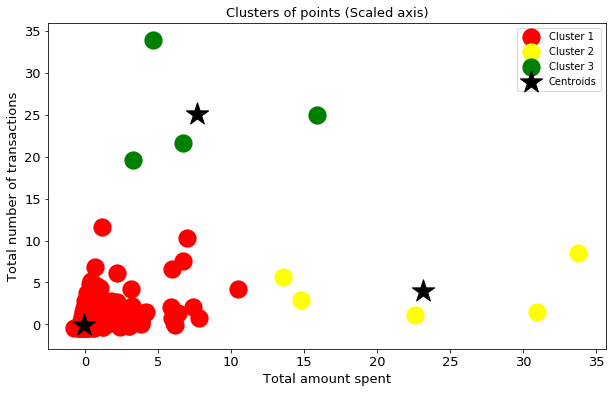

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 150, c = 'red', label = 'Cluster 1',linewidths=6)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 150, c = 'yellow', label = 'Cluster 2',linewidths=6)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 150, c = 'green', label = 'Cluster 3',linewidths=6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 550, c = 'black', label = 'Centroids',marker='*')
plt.title('Clusters of points (Scaled axis)',fontsize = 13)
plt.xlabel('Total amount spent',fontsize = 13)
plt.ylabel('Total number of transactions',fontsize = 13)
plt.tick_params(labelsize=13)
plt.legend();

Note: Because we used standard scaler, values on x-axis and y-axis are scaled, and due to this we are not getting the actual insight.

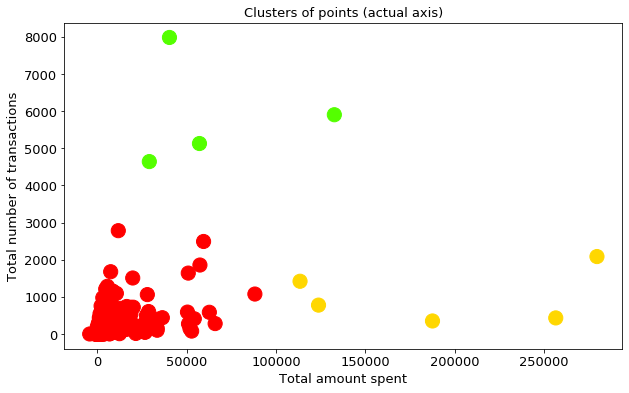

In [62]:
# Plotting y_kmeans (clusters) on actual scale.
plt.figure(figsize=(10,6))
plt.scatter(data_new['Total Amount Spent'],data_new['Total Transactions'], c = y_kmeans, s = 200, cmap='prism')
plt.title('Clusters of points (actual axis)',fontsize = 13)
plt.xlabel('Total amount spent',fontsize = 13)
plt.ylabel('Total number of transactions',fontsize = 13)
plt.tick_params(labelsize=13);

In [63]:
data_new = data_new.rename(columns={'prediction':'kmeans prediction'})
data_new.head()

,CustomerID,Total Amount Spent,Total Transactions,kmeans prediction
0,12346.0,0.00,2,0
1,12347.0,4310.00,182,0
2,12348.0,1797.24,31,0
3,12349.0,1757.55,73,0
4,12350.0,334.40,17,0


## Evaluation

### Silhouette Scores

A score of -1 means poor clustering, 0 means cluster overrlap, and 1 means good clusterning. 

In [64]:
from sklearn import metrics

In [65]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

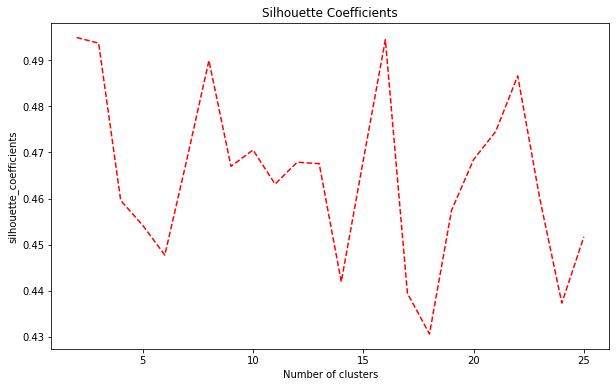

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 26), silhouette_coefficients,color='red',linestyle='dashed')
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients');

### Davies-Bouldin Score

Davies score is the average similarity measure of each cluster with its most similar cluster.

The minimum score is zero, with lower values indicating better clustering.

In [67]:
from sklearn.metrics import davies_bouldin_score
davies_coefficients = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    davies_coefficients.append(score)

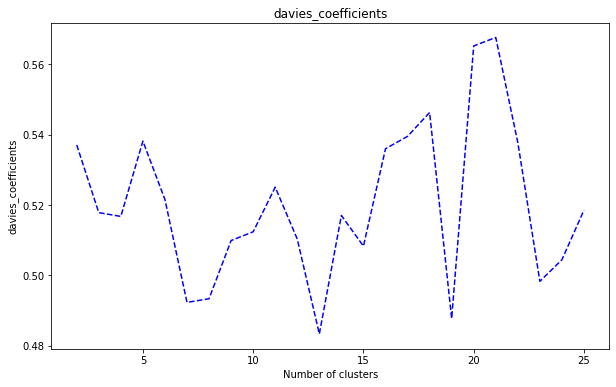

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 26), davies_coefficients,color='blue',linestyle='dashed')
plt.title('davies_coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('davies_coefficients');

In [69]:
print("Silhouette Coefficient for k Means Clustering:", round(metrics.silhouette_score(X, y_kmeans),3))

Silhouette Coefficient for k Means Clustering: 0.974


overall performance of K Means model is very good.

## Hierarchical Clustering Model

In [70]:
X

array([[-0.23100099, -0.3917197 ],
       [ 0.29343167,  0.38265697],
       [-0.01231622, -0.26695902],
       ...,
       [-0.20951263, -0.34439668],
       [ 0.02390005,  2.85205812],
       [-0.00744423, -0.0991774 ]])

In hierarchical clustering, we will use a dendrogram to find the optimal number of clusters and in the dendrogram, we will look for the longest vertical line (distance) which will not cross/intersect any horizontal line and that line will give us our threshold line.

In [71]:
import scipy.cluster.hierarchy as sch

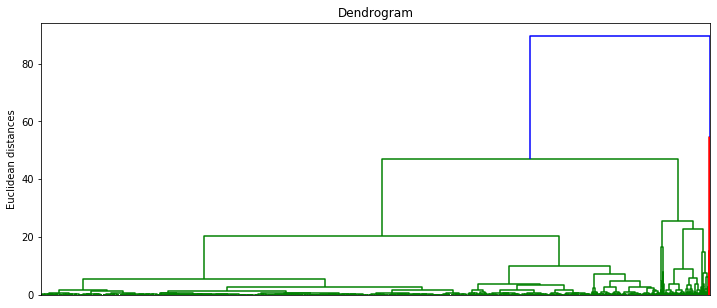

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
ax.set_title('Dendrogram')
ax.set_ylabel('Euclidean distances')
ax.set_xticks([]);

In dendrogram we can only see one major cluster (green). But we will select number of clusters=2 for hierarchical clustering.

###  Agglomerative Clustering

Agglomerative clustering is a bottom-up approach.

In [73]:
# ward method is trying to minimize the variance in each of the cluster.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [74]:
Agglomerative_prediction = pd.DataFrame(y_hc, columns=['Agglomerative prediction'])
data_new = data_new.join(Agglomerative_prediction)

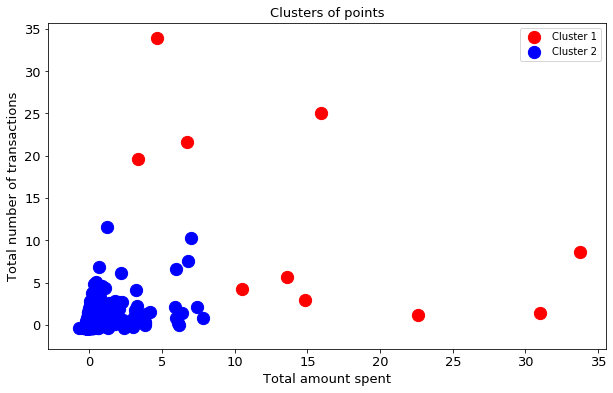

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 150, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of points',fontsize = 13)
plt.xlabel('Total amount spent',fontsize = 13)
plt.ylabel('Total number of transactions',fontsize = 13)
plt.tick_params(labelsize=13)
plt.legend();

In [76]:
print("Silhouette Coefficient for Hierarchical Clustering:", round(metrics.silhouette_score(X, y_hc),3))

Silhouette Coefficient for Hierarchical Clustering: 0.973


overall performance of Hierarchical model is good.

## DBSCAN Clustering Model

It is a density-based clustering, good for arbitrary-shape clusters (clusters within clusters). 

In [77]:
X

array([[-0.23100099, -0.3917197 ],
       [ 0.29343167,  0.38265697],
       [-0.01231622, -0.26695902],
       ...,
       [-0.20951263, -0.34439668],
       [ 0.02390005,  2.85205812],
       [-0.00744423, -0.0991774 ]])

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

In [80]:
db_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
dbscan_prediction = pd.DataFrame(db_labels, columns=['dbscan prediction'])
data_new = data_new.join(dbscan_prediction)

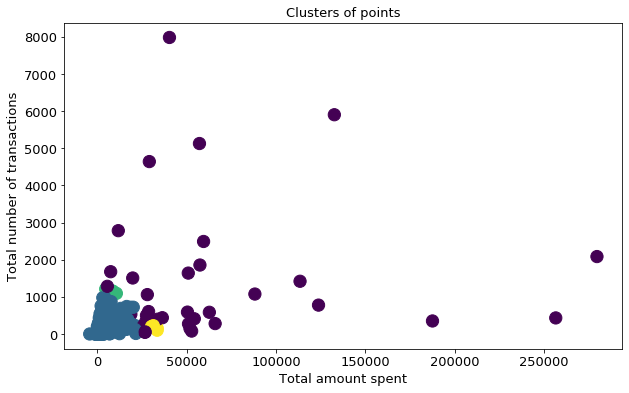

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(data_new['Total Amount Spent'],data_new['Total Transactions'],c = db.labels_, s = 150)
plt.title('Clusters of points',fontsize = 13)
plt.xlabel('Total amount spent',fontsize = 13)
plt.ylabel('Total number of transactions',fontsize = 13)
plt.tick_params(labelsize=13);

In [83]:
print("Silhouette Coefficient for DBSCAN Clustering:", round(metrics.silhouette_score(X, db_labels),3))

Silhouette Coefficient for DBSCAN Clustering: 0.85


overall performance of DBSCAN model is okay. 

## Comparison

In [84]:
data_new.head()

,CustomerID,Total Amount Spent,Total Transactions,kmeans prediction,Agglomerative prediction,dbscan prediction
0,12346.0,0.00,2,0,1,0
1,12347.0,4310.00,182,0,1,0
2,12348.0,1797.24,31,0,1,0
3,12349.0,1757.55,73,0,1,0
4,12350.0,334.40,17,0,1,0


In [85]:
models = pd.DataFrame({'Models': ['K Means Clustering','Hierarchical Clustering','DBSCAN Clustering'],
                       'Silhouette Score':  [0.974,0.973,0.85], 'No. of clusters':[3,2,4]})

In [86]:
models

,Models,Silhouette Score,No. of clusters
0,K Means Clustering,0.974,3
1,Hierarchical Clustering,0.973,2
2,DBSCAN Clustering,0.850,4


## Conclusion

### Best model is K Means with silhouette score = 0.97 and number of clusters = 3.

#### Thankyou